  # Service Efficiency Analysis (25 Marks)

In [4]:
# Imports
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [5]:

path = '/content/queue_system_sqlite3.db'

In [6]:
con = sq3.Connection(path)

# 1.  Data Preparation

In [7]:
query = """
SELECT id,service_id,waiting_time,served_time,turn_around_time
FROM calls;
"""
observations = pd.read_sql(query, con)
print(observations)

        id  service_id waiting_time served_time turn_around_time
0       28           1     00:06:45    00:08:01         00:14:46
1       29           1     00:13:39    00:00:08         00:13:47
2       30           2     00:00:13        None             None
3       31           1     00:10:17    00:00:04         00:10:21
4       32           3     00:00:29    00:01:02         00:01:31
...    ...         ...          ...         ...              ...
3349  4017           2     00:46:25    00:25:58         01:12:23
3350  4018           2     00:40:11    00:12:38         00:52:49
3351  4019           2     00:28:56        None             None
3352  4020           2     00:08:03        None             None
3353  4021           2     01:18:59    01:36:20         02:55:19

[3354 rows x 5 columns]


In [8]:
# Convert time columns to datetime
observations['waiting_time'] = pd.to_timedelta(observations['waiting_time'])
observations['served_time'] = pd.to_timedelta(observations['served_time'])
observations['turn_around_time'] =pd.to_timedelta(observations['turn_around_time'])


In [9]:
# Calculate duration in minutes
observations['waiting_time'].fillna(pd.Timedelta(0),inplace=True)
observations['served_time'].fillna(pd.Timedelta(0),inplace=True)
observations['turn_around_time'].fillna(pd.Timedelta(0),inplace=True)

In [10]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                3354 non-null   int64          
 1   service_id        3354 non-null   int64          
 2   waiting_time      3354 non-null   timedelta64[ns]
 3   served_time       3354 non-null   timedelta64[ns]
 4   turn_around_time  3354 non-null   timedelta64[ns]
dtypes: int64(2), timedelta64[ns](3)
memory usage: 131.1 KB


In [11]:
# Check for missing values
print("Missing Values:")
print(observations.isnull().sum())


Missing Values:
id                  0
service_id          0
waiting_time        0
served_time         0
turn_around_time    0
dtype: int64


#  Descriptive Statistics

In [16]:
observations.describe()

,id,service_id,waiting_time,served_time,turn_around_time
count,3354.000000,3354.000000,3354,3354,3354
mean,1984.522660,1.598986,0 days 01:10:08.298151460,0 days 00:09:57.442158616,0 days 01:06:15.805605247
std,1135.376866,0.619216,0 days 00:49:17.112034032,0 days 00:11:35.103846039,0 days 00:55:52.026919612
min,28.000000,1.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,1011.500000,1.000000,0 days 00:29:31.250000,0 days 00:02:14.250000,0 days 00:20:21.500000
50%,1946.500000,2.000000,0 days 01:02:42.500000,0 days 00:08:48.500000,0 days 00:56:29
75%,2960.500000,2.000000,0 days 01:40:31.500000,0 days 00:13:55,0 days 01:42:06.500000
max,4021.000000,3.000000,0 days 04:55:13,0 days 03:03:44,0 days 05:18:21


#   Visualizations

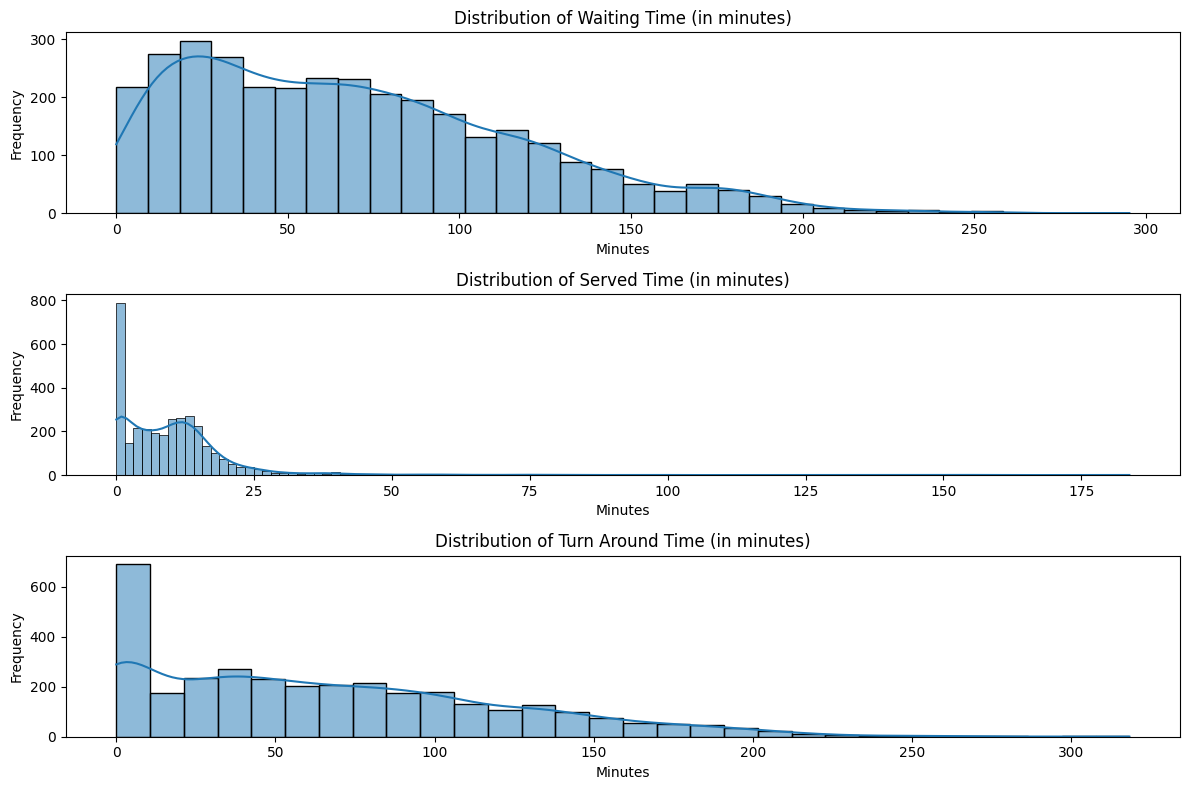

In [13]:
plt.figure(figsize=(12, 8))

# Waiting Time Distribution
plt.subplot(3, 1, 1)
sns.histplot(observations['waiting_time'].dt.total_seconds() / 60, kde=True)
plt.title('Distribution of Waiting Time (in minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Served Time Distribution
plt.subplot(3, 1, 2)
sns.histplot(observations['served_time'].dt.total_seconds() / 60, kde=True)
plt.title('Distribution of Served Time (in minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Turn Around Time Distribution
plt.subplot(3, 1, 3)
sns.histplot(observations['turn_around_time'].dt.total_seconds() / 60, kde=True)
plt.title('Distribution of Turn Around Time (in minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


  # Correlation and Insights

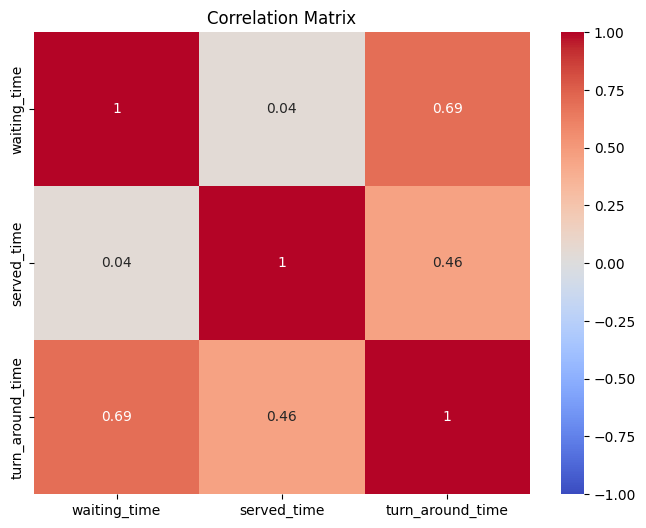


Correlation Insights:
Correlation between waiting time and served time: 0.04
Correlation between waiting time and turn around time: 0.69
Correlation between served time and turn around time: 0.46


In [14]:

correlation_matrix = observations[['waiting_time', 'served_time', 'turn_around_time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation Insights:")
print(f"Correlation between waiting time and served time: {correlation_matrix.loc['waiting_time', 'served_time']:.2f}")
print(f"Correlation between waiting time and turn around time: {correlation_matrix.loc['waiting_time', 'turn_around_time']:.2f}")
print(f"Correlation between served time and turn around time: {correlation_matrix.loc['served_time', 'turn_around_time']:.2f}")



Dataset Summary:
ID and Service ID:

id and service_id columns have their count, mean, std (standard deviation), min, 25th percentile (Q1), median (Q2), 75th percentile (Q3), and max values listed. These are identifiers and don't directly impact the correlation insights but help understand the dataset's structure.
Waiting Time, Served Time, Turn Around Time:

Waiting Time:

Mean: ~1 hour 10 minutes
Std (Standard Deviation): ~49 minutes
Min: 0 (indicating some cases with no waiting time)
25% (Q1): ~29 minutes
Median (Q2): ~1 hour 2 minutes
75% (Q3): ~1 hour 40 minutes
Max: ~4 hours 55 minutes
Served Time:

Mean: ~10 minutes
Std (Standard Deviation): ~11 minutes
Min: 0 (indicating some cases with no served time)
25% (Q1): ~2 minutes
Median (Q2): ~9 minutes
75% (Q3): ~14 minutes
Max: ~3 hours 4 minutes
Turn Around Time:

Mean: ~1 hour 6 minutes
Std (Standard Deviation): ~55 minutes
Min: 0 (indicating some cases with no turn around time)
25% (Q1): ~20 minutes
Median (Q2): ~56 minutes
75% (Q3): ~1 hour 42 minutes
Max: ~5 hours 18 minutes
Correlation Interpretations with Statistical Context:
Waiting Time and Served Time (0.04):

Very weak correlation: The minimal correlation (0.04) indicates that the variability in waiting time does not explain the variability in served time. This is consistent with the observed large standard deviations and the spread from min to max values, showing that served time varies independently of waiting time.
Waiting Time and Turn Around Time (0.69):

Moderate to strong correlation: The correlation of 0.69 suggests a strong relationship between waiting time and turn around time. Given that turn around time is the sum of waiting and served times, it makes sense that a longer waiting time would contribute significantly to a longer turn around time. The statistics show a wide range for both waiting time and turn around time, supporting the observed correlation.
Served Time and Turn Around Time (0.46):

Moderate correlation: The 0.46 correlation coefficient indicates a moderate positive relationship between served time and turn around time. This makes sense because served time is part of the turn around time, although it appears that waiting time has a more substantial impact on the overall turn around time given the stronger correlation.
Additional Insights:
Waiting Time has the highest standard deviation among the three, indicating significant variability, which aligns with its strong correlation with turn around time.
Served Time shows considerable variability but is generally much shorter on average compared to waiting and turn around times, which influences its lower correlation with waiting time and moderate correlation with turn around time.
The wide range from min to max values across all three variables highlights the diversity in the dataset, contributing to the observed correlations.
These statistical insights provide a clearer understanding of the relationships and dependencies between waiting time, served time, and turn around time in your dataset.